**Part1**


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

AxesImage(shape=(256, 256))


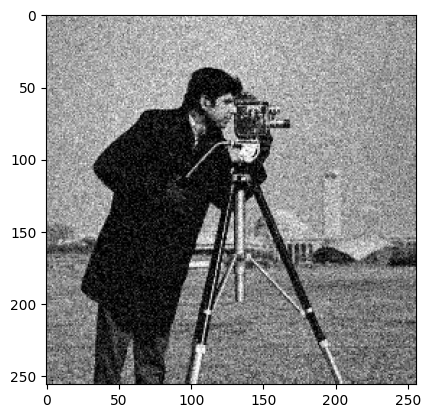

In [12]:
wr = 10
ps = 7
ws = wr*2 + 1
pr = 3
image = Image.open("cameraman.png")
image_np = np.array(image)

noise = np.random.normal(0,25,image_np.shape)
noisy_image = np.clip(image + noise, 0, 255)

print(plt.imshow(noisy_image,cmap="gray"))

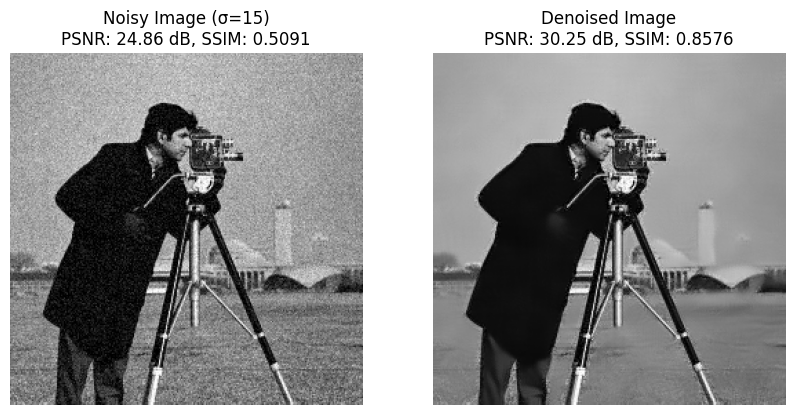

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

wr = 10
ps = 7
ws = wr * 2 + 1
pr = 3
H = 16
A = ps * ps

image = Image.open("cameraman.png").convert("L")
image_np = np.array(image, dtype=np.float32)

noise = np.random.normal(0, 15, image_np.shape)
noisy_image = np.clip(image_np + noise, 0, 255)

psnr_noisy = psnr(image_np, noisy_image, data_range=255)
ssim_noisy = ssim(image_np, noisy_image, data_range=255)

pad = ws // 2
padded_image = np.pad(noisy_image, pad, mode='reflect')

h, w = noisy_image.shape
half_patch = ps // 2
half_search = ws // 2

denoised_image = np.zeros_like(noisy_image)

for i in range(h):
    for j in range(w):
        i_p, j_p = i + pad, j + pad

        ref_patch = padded_image[i_p - half_patch : i_p + half_patch + 1,
                                 j_p - half_patch : j_p + half_patch + 1]

        weights = []
        patches = []

        for m in range(i_p - half_search, i_p + half_search + 1 - ps + 1):
            for n in range(j_p - half_search, j_p + half_search + 1 - ps + 1):

                neighbor_patch = padded_image[m : m + ps, n : n + ps]

                dist2 = np.sum((ref_patch - neighbor_patch) ** 2)
                weight = np.exp(-dist2 / (A * H**2))

                weights.append(weight)
                patches.append(padded_image[m + half_patch, n + half_patch])

        weights = np.array(weights)
        patches = np.array(patches)

        weights /= (weights.sum() + 1e-8)

        denoised_image[i, j] = np.sum(weights * patches)

psnr_denoised = psnr(image_np, denoised_image, data_range=255)
ssim_denoised = ssim(image_np, denoised_image, data_range=255)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap="gray")
plt.title(f"Noisy Image (σ=15)\nPSNR: {psnr_noisy:.2f} dB, SSIM: {ssim_noisy:.4f}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(denoised_image, cmap="gray")
plt.title(f"Denoised Image\nPSNR: {psnr_denoised:.2f} dB, SSIM: {ssim_denoised:.4f}")
plt.axis("off")
plt.show()


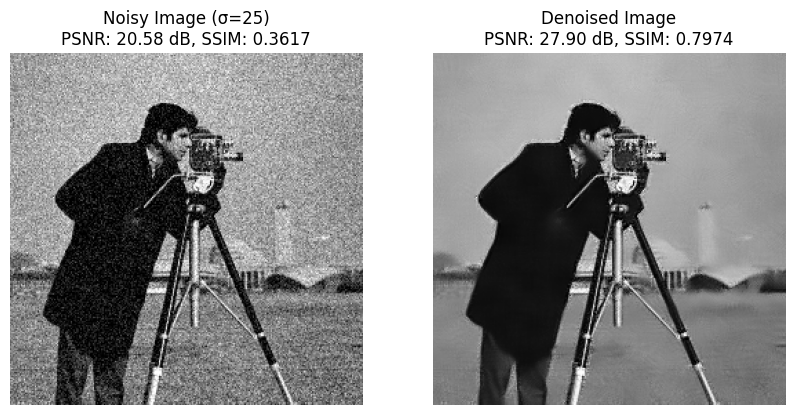

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

wr = 10
ps = 7
ws = wr * 2 + 1
pr = 3
H = 24
A = ps * ps

image = Image.open("cameraman.png").convert("L")
image_np = np.array(image, dtype=np.float32)

noise = np.random.normal(0, 25, image_np.shape)
noisy_image = np.clip(image_np + noise, 0, 255)

psnr_noisy = psnr(image_np, noisy_image, data_range=255)
ssim_noisy = ssim(image_np, noisy_image, data_range=255)

pad = ws // 2
padded_image = np.pad(noisy_image, pad, mode='reflect')

h, w = noisy_image.shape
half_patch = ps // 2
half_search = ws // 2

denoised_image = np.zeros_like(noisy_image)

for i in range(h):
    for j in range(w):
        i_p, j_p = i + pad, j + pad

        ref_patch = padded_image[i_p - half_patch : i_p + half_patch + 1,
                                 j_p - half_patch : j_p + half_patch + 1]

        weights = []
        patches = []

        for m in range(i_p - half_search, i_p + half_search + 1 - ps + 1):
            for n in range(j_p - half_search, j_p + half_search + 1 - ps + 1):

                neighbor_patch = padded_image[m : m + ps, n : n + ps]

                dist2 = np.sum((ref_patch - neighbor_patch) ** 2)
                weight = np.exp(-dist2 / (A * H**2))

                weights.append(weight)
                patches.append(padded_image[m + half_patch, n + half_patch])

        weights = np.array(weights)
        patches = np.array(patches)

        weights /= (weights.sum() + 1e-8)

        denoised_image[i, j] = np.sum(weights * patches)

psnr_denoised = psnr(image_np, denoised_image, data_range=255)
ssim_denoised = ssim(image_np, denoised_image, data_range=255)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap="gray")
plt.title(f"Noisy Image (σ=25)\nPSNR: {psnr_noisy:.2f} dB, SSIM: {ssim_noisy:.4f}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(denoised_image, cmap="gray")
plt.title(f"Denoised Image\nPSNR: {psnr_denoised:.2f} dB, SSIM: {ssim_denoised:.4f}")
plt.axis("off")
plt.show()


**Part 2 and Part 3**

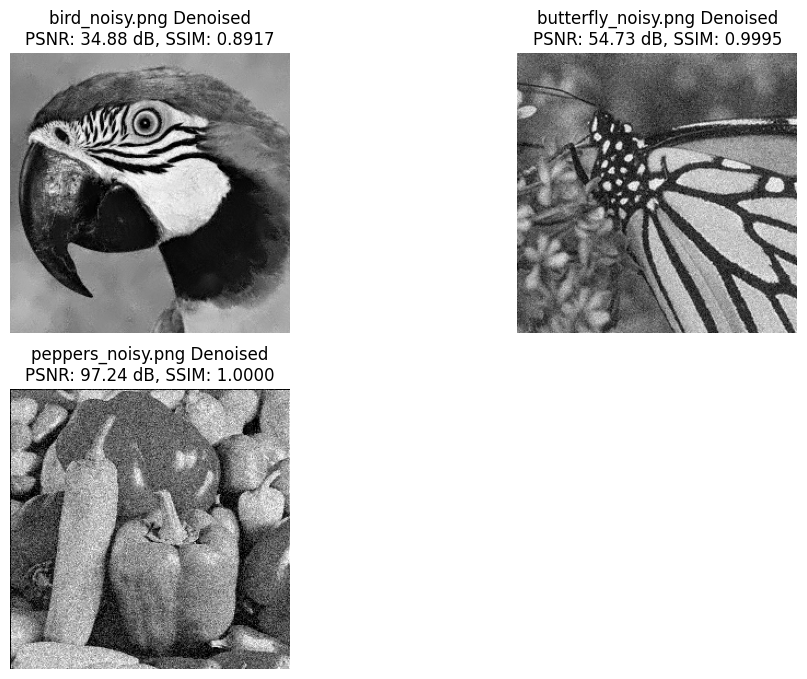

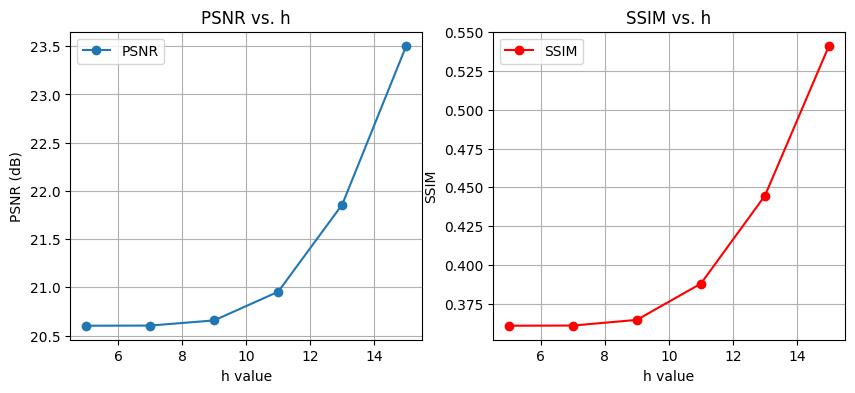

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim


wr = 10
ps = 7
ws = wr * 2 + 1
pr = 3
h_values = [5, 7, 9, 11, 13, 15]
A = ps * ps


def nlm_denoise(noisy_image, h):
    pad = ws // 2
    padded_image = np.pad(noisy_image, pad, mode='reflect')

    h_img, w_img = noisy_image.shape
    half_patch = ps // 2
    half_search = ws // 2

    denoised_image = np.zeros_like(noisy_image)

    for i in range(h_img):
        for j in range(w_img):
            i_p, j_p = i + pad, j + pad

            ref_patch = padded_image[i_p - half_patch : i_p + half_patch + 1,
                                     j_p - half_patch : j_p + half_patch + 1]

            weights = []
            patches = []

            for m in range(i_p - half_search, i_p + half_search + 1 - ps + 1):
                for n in range(j_p - half_search, j_p + half_search + 1 - ps + 1):

                    neighbor_patch = padded_image[m : m + ps, n : n + ps]

                    dist2 = np.sum((ref_patch - neighbor_patch) ** 2)
                    weight = np.exp(-dist2 / (A * h**2))

                    weights.append(weight)
                    patches.append(padded_image[m + half_patch, n + half_patch])

            weights = np.array(weights)
            patches = np.array(patches)

            weights /= weights.sum()
            denoised_image[i, j] = np.sum(weights * patches)

    return denoised_image


image_files = ["bird_noisy.png", "butterfly_noisy.png", "peppers_noisy.png"]
images = {file: np.array(Image.open(file).convert("L"), dtype=np.float32) for file in image_files}


h_fixed = 7
denoised_images = {name: nlm_denoise(img, h_fixed) for name, img in images.items()}


metrics = {}
for name, img in images.items():
    denoised = denoised_images[name]
    psnr_val = psnr(img, denoised, data_range=255)
    ssim_val = ssim(img, denoised, data_range=255)
    metrics[name] = (psnr_val, ssim_val)


plt.figure(figsize=(12, 8))
for idx, (name, denoised) in enumerate(denoised_images.items()):
    plt.subplot(2, 2, idx + 1)
    plt.imshow(denoised, cmap="gray")
    plt.title(f"{name} Denoised\nPSNR: {metrics[name][0]:.2f} dB, SSIM: {metrics[name][1]:.4f}")
    plt.axis("off")
plt.show()


psnr_vals, ssim_vals = [], []
cameraman_image = np.array(Image.open("cameraman.png").convert("L"), dtype=np.float32)
cam_noi = np.random.normal(0, 25, cameraman_image.shape)
cam_noisy = np.clip(cameraman_image + cam_noi, 0, 255)
for h in h_values:
    denoised = nlm_denoise(cam_noisy, h)
    psnr_vals.append(psnr(cameraman_image, denoised, data_range=255))
    ssim_vals.append(ssim(cameraman_image, denoised, data_range=255))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(h_values, psnr_vals, marker="o", linestyle="-", label="PSNR")
plt.xlabel("h value")
plt.ylabel("PSNR (dB)")
plt.title("PSNR vs. h")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h_values, ssim_vals, marker="o", linestyle="-", color="r", label="SSIM")
plt.xlabel("h value")
plt.ylabel("SSIM")
plt.title("SSIM vs. h")
plt.grid(True)
plt.legend()
plt.show()
